supervised ML and unsupervised ML
supervised learning aims to solve classification problems. Helps us know which models we are to use.
Financial datasets we likely have a regression problem due to presence of numeric values key questions are how much , how many ??

linear regression, random forest, decision tree

classification problems we have categorical data : KNN, SVM, Naive Bayes, Decision trees, Random forest.
Mean square error if low , then we know how our model is working.

regression output has contiouns variables such as price. 

Logistic regression for categorical data. Male/female, yes/no , convert to binary, spam/notspam

Categorical data such as Male female, yes or no these are clustering problems

unsupervised models
These have no labels, such models create clusters, patterns based on data fed into the model.it groups related data points.
it doesn tgive you a direct prediction. Algorithms used here are : hamilton distance, 

Other models
reinforcement learning
Neural Networks

Evalution of models
confusion matrix = true negative, false negative, true positive , false positve

Training our model 
Training on 80% of data and test on 20% of the data.
over fitting and under fitting- your model needs to be optimal for your prediction to be accurate.

To Reduce overfitting , there are methods we use , such as 

In [1]:
import pandas as pd
import numpy as np

In [2]:
club = pd.read_excel('C:/Users/KENNY PC/Downloads/PricingOfDiamonds.xlsx' )
club.head()

,ID,carat,cut,colour,clarity,depth,price,x,y,P,PC
0,1,0.23,Ideal,E,SI2,61.5,326,1417.391304,5.300813,Negative,Negative
1,2,0.21,Premium,E,SI1,59.8,326,1552.380952,5.451505,Positive,Negative
2,3,0.23,Good,E,VS1,56.9,327,1421.739130,5.746924,Positve,Negative
3,4,0.29,Premium,I,VS2,62.4,334,1151.724138,5.352564,NR,Negative
4,5,0.31,Good,J,SI2,63.3,335,1080.645161,5.292259,NR,Negative


In [3]:
club.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       53940 non-null  int64  
 1   carat    53940 non-null  float64
 2   cut      53940 non-null  object 
 3   colour   53940 non-null  object 
 4   clarity  53940 non-null  object 
 5   depth    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   P        53930 non-null  object 
 10  PC       53930 non-null  object 
dtypes: float64(4), int64(2), object(5)
memory usage: 4.5+ MB


In [4]:
club.isna().sum()

ID          0
carat       0
cut         0
colour      0
clarity     0
depth       0
price       0
x           0
y           0
P          10
PC         10
dtype: int64

In [5]:
club22= club.dropna()
club22.head()

,ID,carat,cut,colour,clarity,depth,price,x,y,P,PC
0,1,0.23,Ideal,E,SI2,61.5,326,1417.391304,5.300813,Negative,Negative
1,2,0.21,Premium,E,SI1,59.8,326,1552.380952,5.451505,Positive,Negative
2,3,0.23,Good,E,VS1,56.9,327,1421.739130,5.746924,Positve,Negative
3,4,0.29,Premium,I,VS2,62.4,334,1151.724138,5.352564,NR,Negative
4,5,0.31,Good,J,SI2,63.3,335,1080.645161,5.292259,NR,Negative


In [6]:
club22.isna().sum()

ID         0
carat      0
cut        0
colour     0
clarity    0
depth      0
price      0
x          0
y          0
P          0
PC         0
dtype: int64

In [7]:
club22.shape

(53930, 11)

In [8]:
import matplotlib as mat
import seaborn as sns

<Axes: >

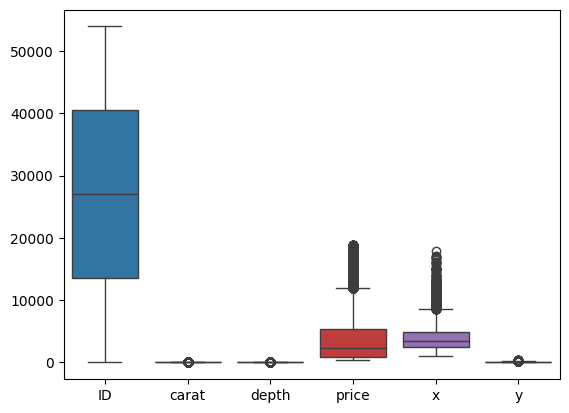

In [9]:
sns.boxplot(club)

In [10]:
club33 = club22.drop(columns=['ID'])
club33.head()

,carat,cut,colour,clarity,depth,price,x,y,P,PC
0,0.23,Ideal,E,SI2,61.5,326,1417.391304,5.300813,Negative,Negative
1,0.21,Premium,E,SI1,59.8,326,1552.380952,5.451505,Positive,Negative
2,0.23,Good,E,VS1,56.9,327,1421.739130,5.746924,Positve,Negative
3,0.29,Premium,I,VS2,62.4,334,1151.724138,5.352564,NR,Negative
4,0.31,Good,J,SI2,63.3,335,1080.645161,5.292259,NR,Negative


<Axes: >

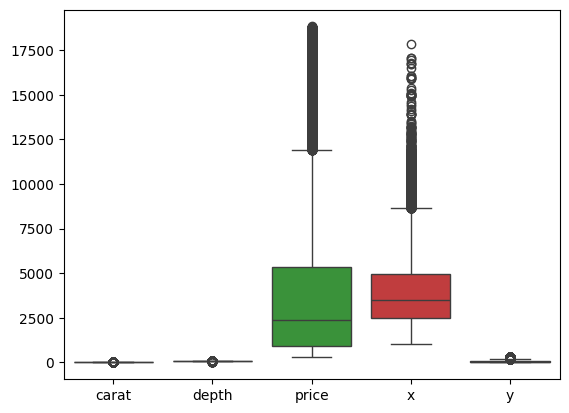

In [11]:
sns.boxplot(club33)

<Axes: xlabel='depth', ylabel='x'>

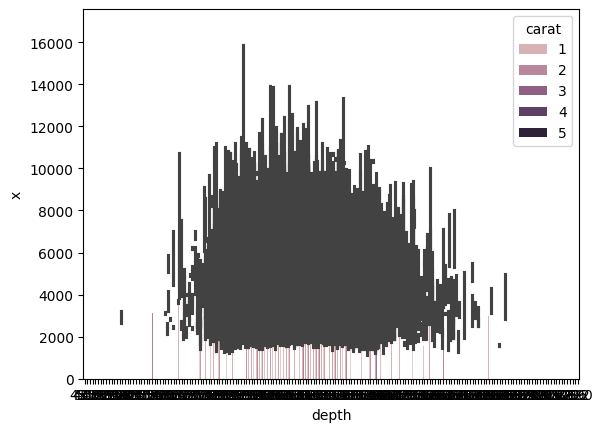

In [13]:
sns.barplot(x='depth', y='x',hue='carat',data=club33)


<Axes: xlabel='depth', ylabel='price'>

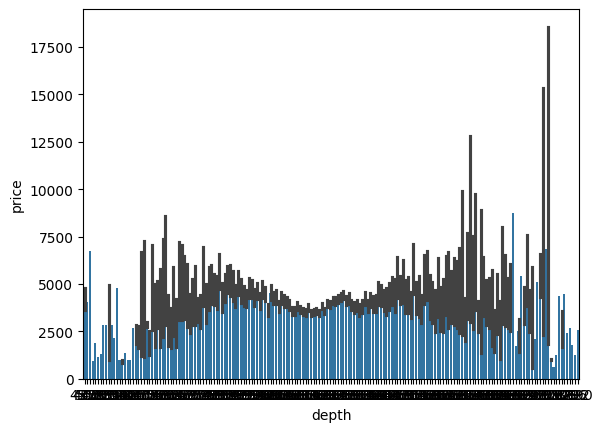

In [14]:
sns.barplot(x='depth', y='price',data=club33)

<Axes: xlabel='carat', ylabel='y'>

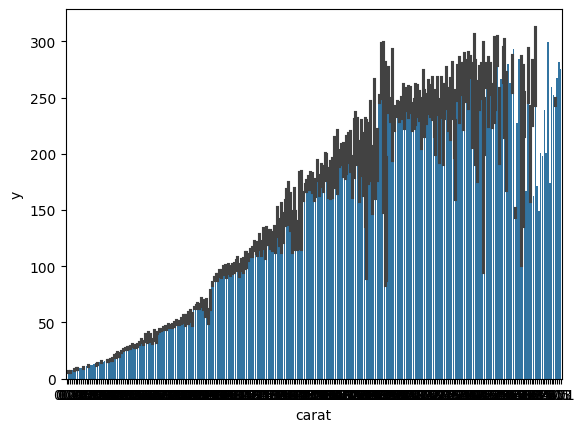

In [19]:
sns.barplot(x='carat', y='y',data=club33)

In [29]:

club33 = club33.apply(pd.to_numeric , errors='coerce')

# Step 2: Drop rows with NaN values
club33 = club33.dropna()

# Step 3: Calculate Z-Scores for each column
z_scores = np.abs((club33 - club33.mean()) / club33.std())

# Step 4: Filter out outliers
threshold = 3
cleanclub44 = club33[(z_scores < threshold).all(axis=1)]

<Axes: >

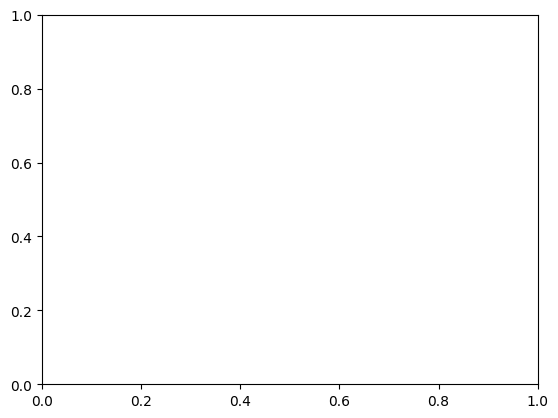

In [28]:
sns.boxplot(cleanclub44)